In [1]:
import pandas as pd
import numpy as np
from pathlib import Path
import sys, os
sys.path.append(os.path.join(os.path.abspath(""), '..', 'pipeline'))

In [2]:
# estasblish path so this works on anyone's machine
here = Path().resolve()

In [3]:
# list of the states we are looking at/interested in
states = ['IA', 'OK', 'MO', 'OK', 'AL', 'LA', 'MS', 'IL', 'IN', 'OH', 'KY', 'TN', 'AR', 'NC', 'SC', 'GA']

In [4]:
# change SIC Code number to your preference
CODE_NUMBER = "0191"

FILEPATH = "data/code_" + CODE_NUMBER + ".csv"
df = pd.read_csv(here.parent / FILEPATH)

In [5]:
df.head()

,Unnamed: 0,COMPANY,ADDRESS LINE 1,CITY,STATE,ZIPCODE,ZIP4,COUNTY CODE,AREA CODE,IDCODE,...,POPULATION CODE,CENSUS TRACT,CENSUS BLOCK,LATITUDE,LONGITUDE,MATCH CODE,CBSA CODE,CBSA LEVEL,CSA CODE,FIPS CODE
0,0,OLD RIVER FARM,50 MILLER RD,MIDDLEFIELD,CT,6455,1229.0,7.0,860,2,...,4,580100,4,41.500023,-72.699730,P,25540,2.0,278,9007
1,1,FELIX CHAC CHUO FARMS INC,89785 80TH AVE,THERMAL,CA,92274,8906.0,65.0,760,2,...,6,45605,5,33.468129,-116.098759,P,40140,2.0,348,6065
2,2,C & N PETERSON FARMS INC,30310 455TH AVE,WAKONDA,SD,57073,6300.0,27.0,605,2,...,2,965800,3,42.992997,-97.096458,P,46820,1.0,0,46027
3,3,E-I-E-I-O FARM LLC,1003 NEWFIELD ST,MIDDLETOWN,CT,6457,1817.0,7.0,860,2,...,7,541200,3,41.586472,-72.674690,P,25540,2.0,278,9007
4,4,DRAGO INDIANA,6147 N COUNTY ROAD 500 W,MULBERRY,IN,46058,9445.0,23.0,765,2,...,3,950300,3,40.377054,-86.596185,P,23140,1.0,320,18023


In [6]:
len(df)

44775

In [7]:
# trim out irrelevant states
df = df[df['STATE'].isin(states)]
df['STATE'].unique()

array(['IN', 'SC', 'IL', 'OH', 'MO', 'OK', 'NC', 'LA', 'AR', 'MS', 'TN',
       'GA', 'IA', 'AL', 'KY'], dtype=object)

<Axes: title={'center': 'Number of Businesses (SIC Code 0191) by State'}, xlabel='STATE', ylabel='Count'>

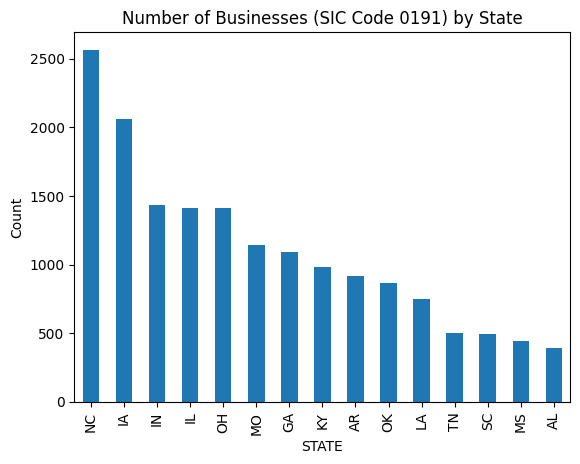

In [8]:
df['STATE'].value_counts().plot(kind='bar', ylabel="Count", title="Number of Businesses (SIC Code 0191) by State")

In [9]:
# examine all of the different SIC6 Descriptions to be able to see the different industries that
# each business is involved in
df['SIC6_DESCRIPTIONS'].value_counts()

SIC6_DESCRIPTIONS
FARMS                                    14285
GENERAL FARMS-PRIMARILY CROP               780
APPLIANCES-HOUSEHOLD-MAJOR-REPAIRING        71
ORGANIC FARMS                               50
TRUCKING                                    43
                                         ...  
CHEMICALS-RETAIL                             1
CUT STONE & STONE PRODUCTS (MFRS)            1
FEED MILL EQUIPMENT & SUPPLIES (MFRS)        1
PAINT-RETAIL                                 1
CORRECTIONAL INSTITUTIONS-PRIVATE            1
Name: count, Length: 366, dtype: int64

In [10]:
# set a min number. Only SIC Descriptions that appear for than x times will be graphed
MIN_NUM_OF_APPEARANCES = 25


value_counts = df['SIC6_DESCRIPTIONS'].value_counts()
filtered_value_counts = value_counts[value_counts > MIN_NUM_OF_APPEARANCES]
df_trim = df[df['SIC6_DESCRIPTIONS'].isin(filtered_value_counts.index)]

<Axes: title={'center': 'Number of Appearances of SIC6 Description'}, xlabel='SIC6_DESCRIPTIONS', ylabel='Count'>

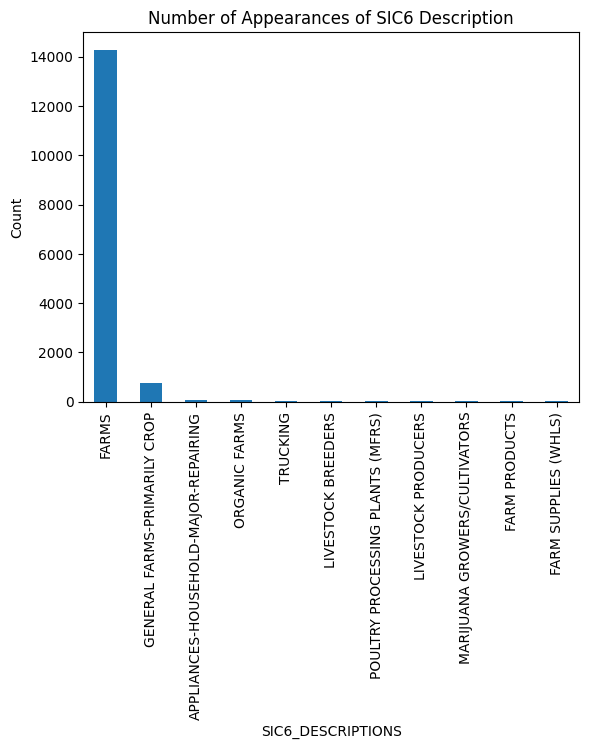

In [11]:
df_trim['SIC6_DESCRIPTIONS'].value_counts().plot(kind='bar', title="Number of Appearances of SIC6 Description", ylabel='Count')